In [154]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [156]:
df = pd.DataFrame()

In [158]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [160]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

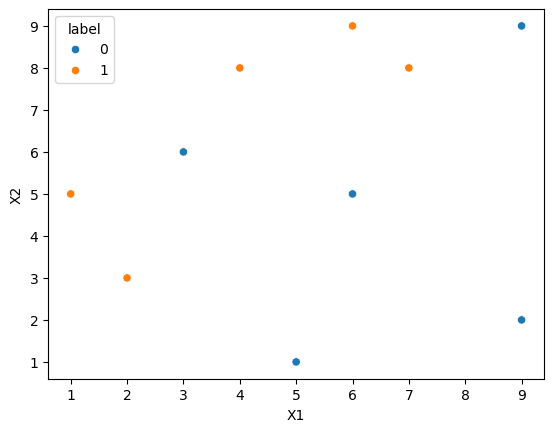

In [162]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [166]:
df.shape[0]

10

In [170]:
df['weights'] = 1/df.shape[0]

In [172]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dt1 = DecisionTreeClassifier(max_depth=1)# decisoon stump

In [176]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [178]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

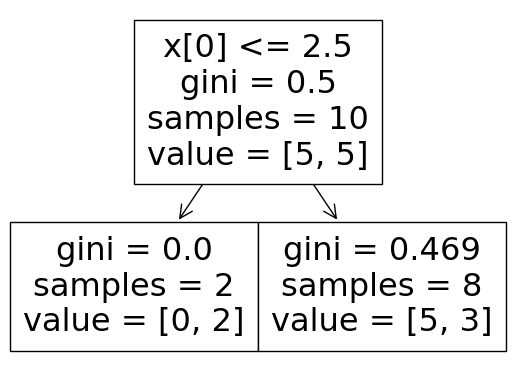

In [180]:
from sklearn.tree import plot_tree
plot_tree(dt1);

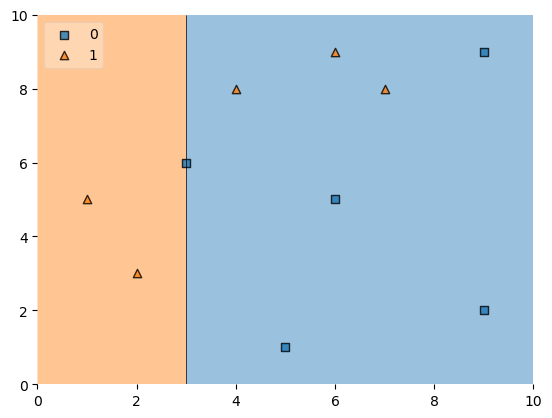

In [182]:
plot_decision_regions(X, y, clf=dt1, legend=2);

In [184]:
df['y_pred'] = dt1.predict(X)

In [186]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [32]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [36]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [188]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha) # for correct classification
  else:
    return row['weights'] * np.exp(alpha) # for misclassified

In [190]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [192]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [194]:
df['updated_weights'].sum()

0.9165153319682015

In [196]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [198]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [200]:
df['nomalized_weights'].sum()

1.0

In [202]:
a=np.array([1,2,3,4,5,6])
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21])

In [204]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [206]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [210]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [343]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [230]:
np.random.random()

0.004862643937599498

In [240]:
for i,j in df.iterrows():
    print(i)

0
1
2
3
4
5
6
7
8
9


In [242]:
# upsampling

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [252]:
index_values = create_new_dataset(df)

index_values

[2, 7, 9, 2, 5, 3, 5, 9, 5, 5]

In [254]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [256]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
7,7,8,1,0.1
9,9,2,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [258]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [260]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [262]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

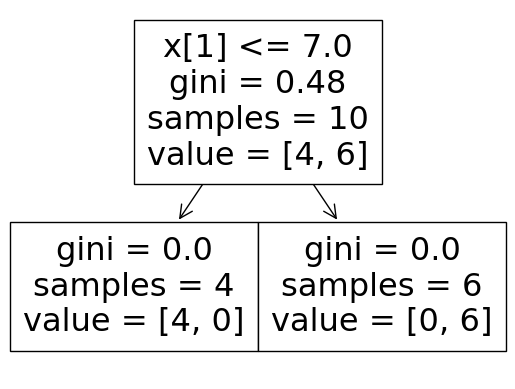

In [264]:
plot_tree(dt2);

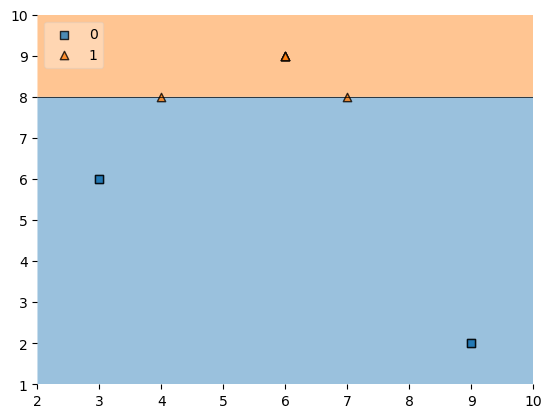

In [270]:
plot_decision_regions(X, y, clf=dt2, legend=2);

In [272]:
second_df['y_pred'] = dt2.predict(X)

In [274]:
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
7,7,8,1,0.1,1
9,9,2,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [276]:
alpha2 = calculate_model_weight(0.1)

In [278]:
alpha2

1.0986122886681098

In [280]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [282]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [284]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622


In [286]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [92]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
0,1,5,1,0.1,0,0.297427,0.344313
8,9,9,0,0.1,1,0.297427,0.344313
3,4,8,1,0.1,1,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922


In [288]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [290]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [292]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [294]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.1,0.0,0.1
7,7,8,1,0.1,1,0.1,0.1,0.2
9,9,2,0,0.1,0,0.1,0.2,0.3
2,3,6,0,0.1,0,0.1,0.3,0.4
5,6,9,1,0.1,1,0.1,0.4,0.5
3,4,8,1,0.1,1,0.1,0.5,0.6
5,6,9,1,0.1,1,0.1,0.6,0.7
9,9,2,0,0.1,0,0.1,0.7,0.8
5,6,9,1,0.1,1,0.1,0.8,0.9
5,6,9,1,0.1,1,0.1,0.9,1.0


In [298]:
index_values = create_new_dataset(second_df)

In [300]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [302]:
third_df

,X1,X2,label,weights
9,9,2,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1


### Prediction

In [304]:
query = np.array([1,5]).reshape(1,2)
query

array([[1, 5]])

In [306]:
dt1.predict(query)

array([1], dtype=int64)

In [308]:
dt2.predict(query)

array([0], dtype=int64)

In [310]:
alpha1*1 + alpha2*(1) 

1.5222612188617117

In [312]:
np.sign(1.522)

1.0

In [142]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [144]:
dt2.predict(query)

array([1], dtype=int64)

In [382]:
dt3.predict(query)

array([0])

In [152]:
alpha1*(1) + alpha2*(-1) 

-0.674963358474508

In [148]:
np.sign(-0.67)

-1.0